In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

train = pd.read_csv('C:/Projects/Titanic/train.csv')
test = pd.read_csv('C:/Projects/Titanic/test.csv')

print("Dimensions of train: {}".format(train.shape))
print("Dimensions of test : {}".format(test.shape))

Dimensions of train: (891, 12)
Dimensions of test : (418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


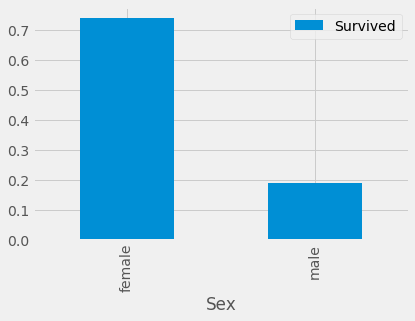

In [13]:
sex_pivot = train.pivot_table(index= "Sex", values = "Survived")
sex_pivot.plot.bar()
plt.show()

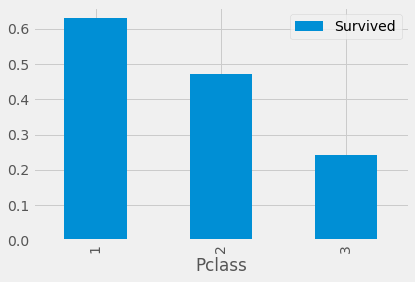

In [16]:
class_pivot = train.pivot_table(index = "Pclass", values = "Survived")
class_pivot.plot.bar()
plt.show()

In [17]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

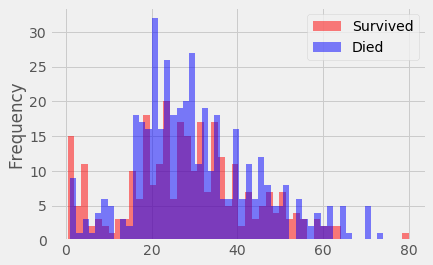

In [21]:
survived = train[train["Survived"]==1]
died = train[train["Survived"]==0]
survived["Age"].plot.hist(alpha = 0.5,color = 'red', bins = 50)
died["Age"].plot.hist(alpha = 0.5, color = 'blue', bins = 50)
plt.legend(['Survived','Died'])
plt.show()

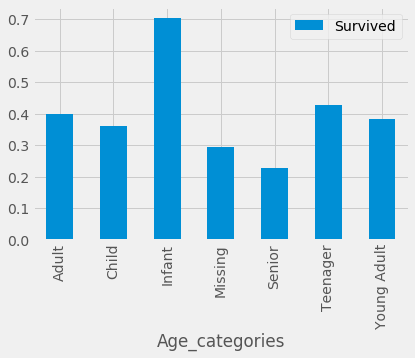

In [22]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points, labels = label_names)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing", "Infant","Child","Teenager","Young Adult", "Adult","Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

pivot = train.pivot_table(index = "Age_categories",values = "Survived")
pivot.plot.bar()
plt.show()

In [23]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummies],axis = 1)
    return df
for column in ["Pclass", "Sex", "Age_categories"]:
    train = create_dummies(train, column)
    test = create_dummies(test, column)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X,all_y,test_size = 0.20, random_state = 0)

In [32]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y,predictions)
print (accuracy)

0.787709497207


In [34]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, all_X,all_y, cv= 10)
scores.sort()
accuracy= scores.mean()

print (scores)
print (accuracy)

[ 0.74157303  0.76136364  0.76404494  0.7752809   0.7752809   0.78888889
  0.79775281  0.80898876  0.81111111  0.84269663]
0.786698161389


In [35]:
holdout = test
lr= LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])

In [37]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId":holdout_ids,
                "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [39]:
submission.to_csv("submission.csv",index = False)